# 1. Import Data 

In [1]:
import pandas as pd
import os

In [2]:
current_dir = os.getcwd()

# Files should be located in the parent directory
file_path = os.path.join(current_dir, '..', "january.csv")
df = pd.read_csv(file_path)
df

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189601,31.48,1.36
2,189701,28.17,-1.95
3,189801,30.67,0.55
4,189901,29.68,-0.44
...,...,...,...
125,202001,35.55,5.43
126,202101,34.59,4.47
127,202201,31.17,1.05
128,202301,35.13,5.01


# 2. Filter and Visualize

Change column names and delete unecessary numbers in the end of years

In [3]:
# Create a copy to avoid modifying the original dataframe
df_copy = df.copy()

df_copy.columns = ['Year', 'Temperature', 'Anomaly']
df_copy.Year = df_copy.Year.floordiv(100)
df_copy

,Year,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95
3,1898,30.67,0.55
4,1899,29.68,-0.44
...,...,...,...
125,2020,35.55,5.43
126,2021,34.59,4.47
127,2022,31.17,1.05
128,2023,35.13,5.01


Filter data up to year 2018

In [4]:

df_before_2018 = df_copy[df_copy['Year'] <= 2018]
df_before_2018

,Year,Temperature,Anomaly
0,1895,26.69,-3.43
1,1896,31.48,1.36
2,1897,28.17,-1.95
3,1898,30.67,0.55
4,1899,29.68,-0.44
...,...,...,...
119,2014,30.56,0.44
120,2015,33.08,2.96
121,2016,32.22,2.10
122,2017,33.57,3.45


Display the Regression Line

In [5]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

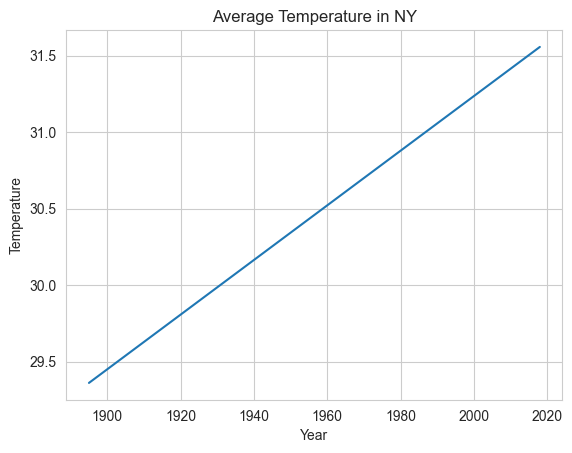

In [52]:
regression = stats.linregress(x=df_before_2018.Year, y=df_before_2018.Temperature)

years = np.linspace(1895, 2018)
temperature = years * regression.slope + regression.intercept

sns.lineplot(x=years, y=temperature)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature in NY')
plt.grid(True)


# 3. Predict Future Temperature

Temperature for the next six years

In [7]:
future_years = np.arange(2019, 2024 + 1)
future_temperature = future_years * regression.slope + regression.intercept
future_temperature

array([31.57406373, 31.59191714, 31.60977054, 31.62762395, 31.64547736,
       31.66333076])

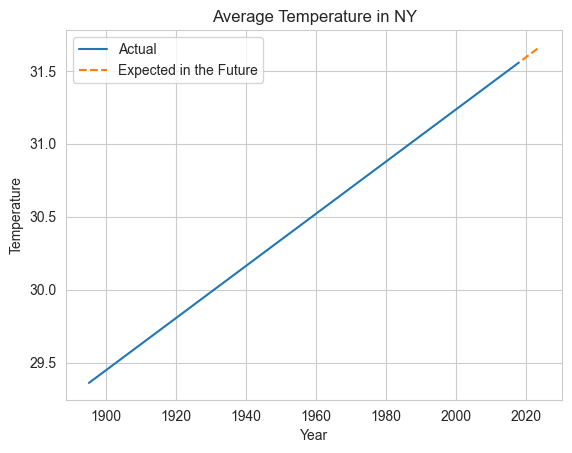

In [47]:
sns.lineplot(x=years, y=temperature, label='Actual')
sns.lineplot(x=future_years, y=future_temperature, linestyle='--', label='Expected in the Future')  

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature in NY')
plt.grid(True)

# 4. Expected Past Temperature

In [9]:
past_years = np.arange(1890, 1895 + 1)
past_temperature = past_years * regression.slope + regression.intercept
past_temperature

array([29.27097426, 29.28882766, 29.30668107, 29.32453448, 29.34238788,
       29.36024129])

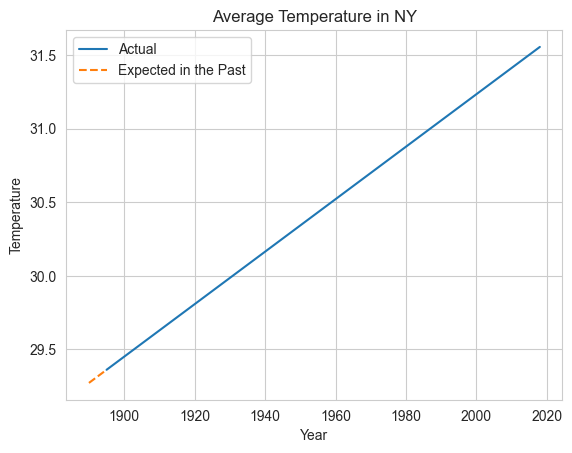

In [48]:
sns.lineplot(x=years, y=temperature, label='Actual')
sns.lineplot(x=past_years, y=past_temperature, linestyle='--', label='Expected in the Past')  

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature in NY')
plt.grid(True)

# 5. Visualize Data

<Axes: title={'center': 'Regplot Average Temperature in NY'}, xlabel='Year', ylabel='Temperature'>

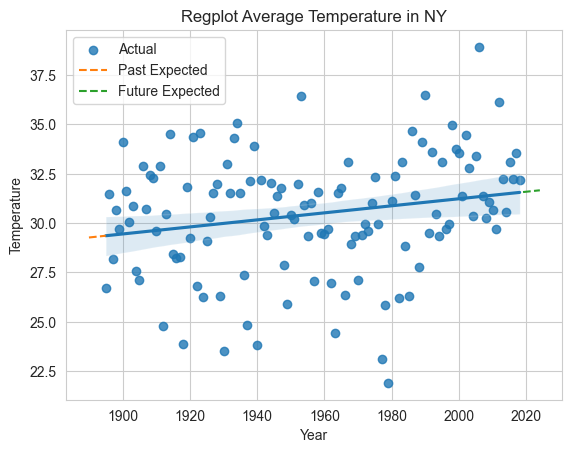

In [49]:
sns.set_style('whitegrid')
plt.title('Regplot Average Temperature in NY')
axes = sns.regplot(x=df_before_2018.Year, y=df_before_2018.Temperature, label='Actual') 
sns.lineplot(x=past_years, y=past_temperature, linestyle='--', label='Past Expected')  
sns.lineplot(x=future_years, y=future_temperature, linestyle='--', label='Future Expected') 

# 6. Plot Scaling

Change temperature scale to fixed (10 and 70)

(10.0, 70.0)

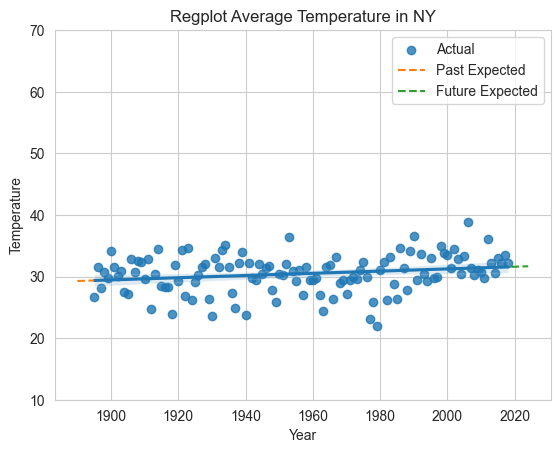

In [43]:
sns.set_style('whitegrid')
plt.title('Regplot Average Temperature in NY')
axes = sns.regplot(x=df_before_2018.Year, y=df_before_2018.Temperature, label='Actual') 
sns.lineplot(x=past_years, y=past_temperature, linestyle='--', label='Past Expected')  
sns.lineplot(x=future_years, y=future_temperature, linestyle='--', label='Future Expected')   
axes.set_ylim(10, 70)

# 7. Data Analysis

Compare predicted values with real one

<Axes: title={'center': 'Average Temperature in NY'}, xlabel='Year', ylabel='Temperature'>

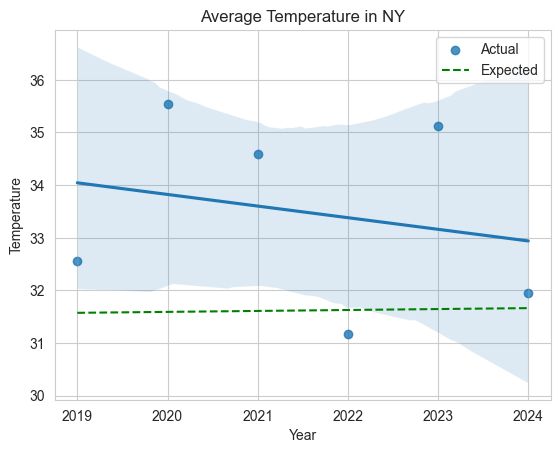

In [71]:
df_after_2018 = df_copy[df_copy['Year'] > 2018]

plt.title('Average Temperature in NY')
axes = sns.regplot(x=df_after_2018.Year, y=df_after_2018.Temperature, label='Actual') 
sns.lineplot(x=future_years, y=future_temperature, color='green', linestyle='--', label='Expected')  


On larger scale

(1960.0, 2027.0)

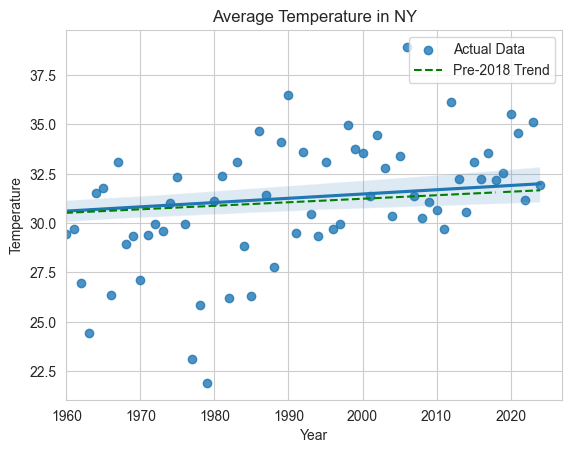

In [78]:
plt.title('Average Temperature in NY')

axes = sns.regplot(x=df_copy.Year, y=df_copy.Temperature, label='Actual Data') 
sns.lineplot(x=years, y=temperature, linestyle='--', color='green', label='Pre-2018 Trend')  
sns.lineplot(x=future_years, y=future_temperature, color='green', linestyle='--')  
axes.set_xlim(1960, 2027)